# Lab 2: Classifying with Real World examples

- Name: Gyanas Luitel
- Group: Computer Science
- Roll No: 27

# The Iris dataset

## Visualization is a good first step

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#We load the data with load_iris from sklearn
from sklearn.datasets import load_iris

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#load_iris returns an object with several fields
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


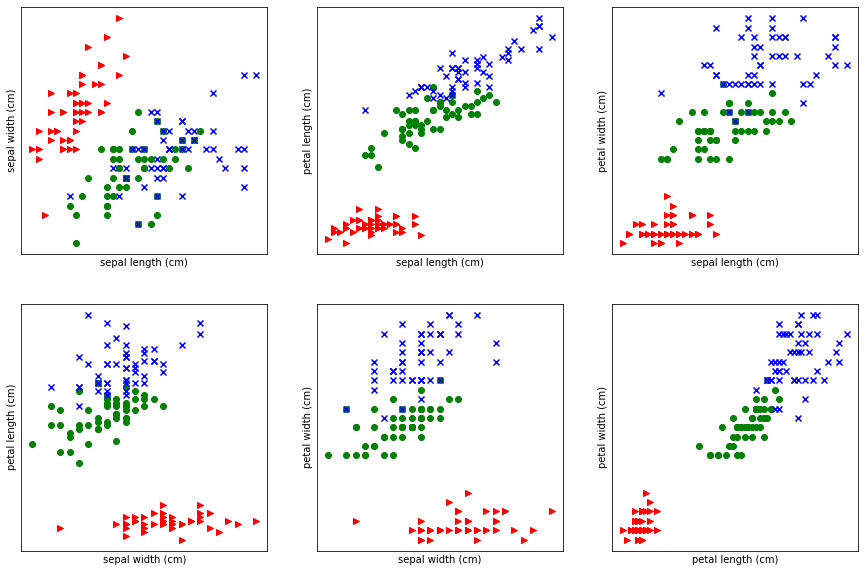

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

#Sett up 3 different pairs of (color, marker)
color_markers = [
    ('r', '>'),
    ('g', 'o'),
    ('b','x')
]

for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]
    
    for t in range(3):
        #Use a different color/marker for each class 't'
        c, marker = color_markers[t]
        ax.scatter(features[target == t, p0], features[target == t, p1], marker = marker, c = c)
        ax.set_xlabel(feature_names[p0])
        ax.set_ylabel(feature_names[p1])
        ax.set_xticks([])
        ax.set_yticks([])
# fig.tight_layout()


## Building our first classification model

In [8]:
#We use NumPy fancy indexing to get an array of strings
labels = target_names[target]
# labels

In [9]:
# The petal length is the feature at position 2
plength = features[:, 2]
# plength

In [10]:
#Build an array of booloeans:
is_setosa = (labels == 'setosa')
# is_setosa

In [11]:
# This is the important step
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.


**Note:** Therefore, we can build a simple model.if petal length is smaller than 2, then this is an Iris Setosa flower, otherwise it is either Iris Virginica or Iris Versicolor.

*The problem of recognizing Iris Setosa apart from the other two species was very easy. However, we cannot immediately see what the best threshold is for distinguishing Iris Virginica from Iris Versicolor. We can even see that we will never achieve perfect separation with these features. We could, however, look for the best
possible separation, the separation that makes the fewest mistakes. For this, we will perform a little computation.*

**We first select only the non-Setosa features and labels:**

In [12]:
# ~ is the boolean negation operator
features = features[~is_setosa]
labels = labels[~is_setosa]

# Build a new target variable, is_virginica
is_virginica = (labels == 'virginica')

In [13]:
len(features)

100

In [14]:
features.shape

(100, 4)

In [15]:
# features

*Now, we run a loop over all possible features and thresholds to see which one results in better accuracy. Accuracy is simply the fraction of examples that the model classifies correctly.*

In [16]:
# Initialize best_acc to impossibly low value
best_acc = -1.0

for fi in range(features.shape[1]):
    # We are going to test all possible thresholds
    thresh = features[:, fi]
#     print(thresh)
    for t in thresh:
#         print(t)
        # Get the vector for feature 'fi'
        feature_i = features[:, fi]
#         print(feature_i)
        # apply threshold 't'
        pred = (feature_i > t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
        
        
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse

In [17]:
print(best_acc, best_fi, best_t, best_reverse)

0.94 3 1.6 False


In [18]:
feature_names[best_fi]

'petal width (cm)'

**Note:** At the end of the for loop, all the possible thresholds for all the possible features have been tested, and the variables best_fi, best_t, and best_reverse hold our model. This is all
the information we need to be able to classify a new, unknown object, that is, to assign a class to it. The following code implements exactly this method:

In [19]:
def is_virginica_test(fi, t, reverse, example):
    "Apply threshold model to a new example"
    test = example[fi] > t
    if reverse:
        test = not test
    return test

**Visualizing the decision boundary obtained from thresholding**

Text(0, 0.5, 'petal length (cm)')

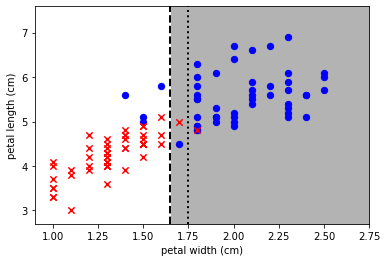

In [21]:
COLOUR_FIGURE  = False

#Hand fixed thresholds:
t = 1.65
t2 = 1.75

#Features to use: 3 & 2
f0, f1 = 3, 2

if COLOUR_FIGURE:
    area1c = (1., .8, .8)
    area2c = (.8, .8, 1.)
else:
    area1c = (1., 1, 1)
    area2c = (.7, .7, .7)

# plot from 90% of smallest value to 110% of largest value
# (all feature values are positive, otherwise this would not work very well)

x0 = features[:, f0].min() * .9
x1 = features[:, f0].max() * 1.1

y0 = features[:, f1].min() * .9
y1 = features[:, f1].max() * 1.1

fig, ax = plt.subplots()
ax.fill_between([t, x1], [y0, y0], [y1, y1], color = area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color = area1c)
ax.plot([t, t], [y0, y1], 'k--', lw = 2)
ax.plot([t2, t2], [y0, y1], 'k:', lw=2)
ax.scatter(features[is_virginica, f0],
          features[is_virginica, f1], c = 'b', marker = 'o', s = 40)
ax.scatter(features[~is_virginica, f0],
          features[~is_virginica, f1], c = 'r', marker = 'x', s = 40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
# fig.tight_layout()

## Evaluation - holding out data and cross-validation

**Helper functions**

In [22]:
def fit_model(features, labels):
    '''Learn a simple threshold'''
    best_acc = -1.0
    #Loop over all th features:
    for fi in range(features.shape[1]):
        thresh = features[:, fi].copy()
        #test all features values in order:
        thresh.sort()
        for t in thresh:
            pred = (features[:, fi] > t)
            
            #Measure the accuracy of this
            acc = (pred == labels).mean()
            
            rev_acc = (pred == ~labels).mean()
            if rev_acc > acc:
                acc = rev_acc
                reverse = True
            else:
                reverse = False
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse
        
        # A model is a threshold and an index
    return best_t, best_fi, best_reverse
    
def predict(model, features):
    '''Apply a learned model'''
    # A model is a pair as returned by fit_model
    t, fi, reverse = model
    if reverse:
        return features[:, fi] <= t
    else:
        return features[:, fi] > t

def accuracy(features, labels, model):
    '''Compute the accuracy of the model'''
    preds = predict(model, features)
    return np.mean(preds == labels)

In [27]:
#Split the data in two: testing and training
testing = np.tile([True, False], 50) #tesing = [True, False, True, False, True, False...]

#Training is the negation of testing: i.e., datapoints not used for testing
#will be used for training
training = ~testing

model = fit_model(features[training], is_virginica[training])
train_accuracy = accuracy(features[training], is_virginica[training], model)
test_accuracy = accuracy(features[testing], is_virginica[testing], model)

print(f"Training accuracy was {train_accuracy*100}%.")
print(f"Testing accuracy was {test_accuracy*100}% (N = {testing.sum()})")

Training accuracy was 96.0%.
Testing accuracy was 90.0% (N = 50)


**Cross-validation:**

In [28]:
correct = 0.0

for ei in range(len(features)):
    #select all but the one at position 'ei':
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features[training], is_virginica[training])
    predictions = predict(model, features[testing])
    correct += np.sum(predictions == is_virginica[testing])
    
acc = correct / float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 87.0%


# Building more complex classifiers

- What makes up a classification model?
    - The structure of the model
    - The search procedure
    - The gain or loss function
  We can play around with these three aspects of classifiers and get different systems. A simple threshold is one of the simplest models available in machine learning libraries and only works well when the problem is very simple, such as with the Iris dataset.
 ***
- In our case, we optimized the threshold to minimize the number of errors. Alternatively, we might have different loss functions. It might be that one type of error is much costlier than the other. In a medical setting, false negatives and false positives are not equivalent.
- A **false negative** (when the result of a test comes back negative, but that is false) might lead to the patient not receiving treatment for a serious disease. 
- A **false positive** (when the result of a test comes back positive even thoufh the patient does not actually have that disease) might lead to additional tests to confirm or unnecessary treatment (which can still have costs, including side effects from the treatment, but are often less serious than missing a diagnostic). 

- Therefore, depending on the exact setting, different trade-offs can make sense. At one extreme, if the disease is fatal and the treatment is cheap with very few negative side-effects, then you want to minimize false negatives as much as you can.

# A more complex dataset and a more complex classifier

## Learning about the Seeds dataset

Agricultural dataset, which is still small, but already too
large to plot exhaustively on a page as we did with Iris. This dataset consists of measurements of wheat seeds. There are seven features that are present, which are as follows:

- area A
- perimeter P
- compactness C = 4πA/P²
- length of kernel
- width of kernel
- asymmetry coefficient
- length of kernel groove

There are 3 classes corresponding to three wheat varieties:
- Canadian
- Koma
- Rosa

The goal is to classify the species based on these morphological measurements.

## Features and feature engineering

One interesting aspect of these features is that the compactness feature is not actually a new measurement, but a function of the previous two features, area and perimeter.
It is often very useful to derive new combined features. Trying to create new features is generally called **feature engineering.**

## Nearest neighbor classification

In [29]:
def load_dataset(dataset_name):
    data = []
    labels = []
    with open('./Chapter02/data/{0}.tsv'.format(dataset_name)) as ifile:
        for line in ifile:
            tokens = line.strip().split('\t')
            data.append([float(tk) for tk in tokens[:-1]])
            labels.append(tokens[-1])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [30]:
feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel', 
    'assymtery coefficient',
    'length of kernel groove'
]

features, labels = load_dataset('seeds')

In [31]:
# print(data.shape)
print(features.shape, labels.shape)

(210, 7) (210,)


In [32]:
np.unique(labels)

array(['Canadian', 'Kama', 'Rosa'], dtype='<U8')

# Classifying with scikit-learn

- scikit-learn has become the standard library for many machine learning tasks, including classification. We are going to use its implementation of nearest neighbor classification in this section.
- The scikit-learn classification API is organized around classifier objects. These objects have the following two essential methods:
    - fit(features, labels): This is the learning step and fits the parameters of the model
    - predict(features): This method can only be called after fit and returns a prediction for one or more inputs

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)

In [34]:
from sklearn.model_selection import KFold

In [35]:
kf = KFold( n_splits=5, shuffle=True)

In [36]:
kf.get_n_splits(len(features))

5

In [37]:
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [38]:
# 'means' will be a list of mean accuracies (one entry per fold)
means = []

for training, testing in kf.split(features):
    # We fit a model for this fold, then apply it to the testing data with 'predict':
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])
    
    #np.mean on an array of booleans returns fraction of correct decisions for this  fold
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
    
print("Mean accuracy: {:.1%}".format(np.mean(means)))

Mean accuracy: 90.5%


**Pipeline**

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier = Pipeline([('norm', StandardScaler()),
                      ('knn', classifier)])

In [45]:
means = []
for training, testing in kf.split(features):
    # We learn a model for this fold with `fit` and then apply it to the
    # testing data with `predict`:
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])
    
    # np.mean on an array of booleans returns fraction
    # of correct decisions for this fold:
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))

Mean accuracy: 92.9%


# Binary and multiclass classification

*The first classifier we used, the threshold classifier, was a simple binary classifier. Its result is either one class or the other, as a point is either above the threshold value or it is not. The second classifier we used, the nearest neighbor classifier, was a natural
multiclass classifier, its output can be one of the several classes.*

*It is often simpler to define a simple binary method than the one that works on multiclass problems. However, we can reduce any multiclass problem to a series of binary decisions. This is what we did earlier in the Iris dataset, in a haphazard way: we observed that it was easy to separate one of the initial classes and focused on the other two, reducing the problem to two binary decisions:*

   - Is it an Iris Setosa (yes or no)?
   - If not, check whether it is an Iris Virginica (yes or no).

*Of course, we want to leave this sort of reasoning to the computer. As usual, there are several solutions to this multiclass reduction.*

*The simplest is to use a series of one versus the rest classifiers. For each possible label ℓ, we build a classifier of the type is this ℓ or something else? When applying the rule, exactly one of the classifiers will say yes and we will have our solution.*
*Unfortunately, this does not always happen, so we have to decide how to deal with either multiple positive answers or n  positive answers.*

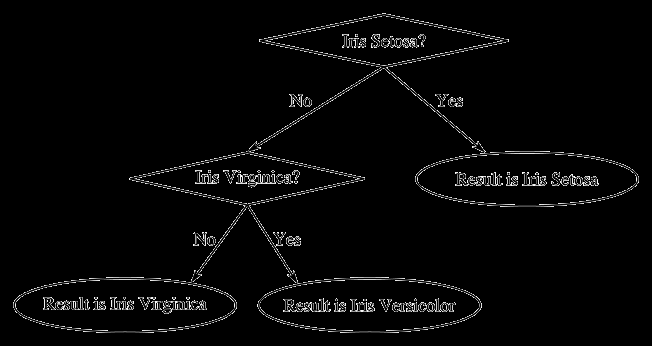

*Alternatively, we can build a classification tree. Split the possible labels into two, and build a classifier that asks, "Should this example go in the left or the right bin?" We can perform this splitting recursively until we obtain a single label. The preceding diagram depicts the tree of reasoning for the Iris dataset. Each diamond is a single binary classifier. It is easy to imagine that we could make this tree larger and encompass more decisions. This means that any classifier that can be used for binary classification can also be adapted to handle any number of classes in a simple way.*

*There are many other possible ways of turning a binary method into a multiclass one. There is no single method that is clearly better in all cases. The scikit-learn module implements several of these methods in the "sklearn.multiclass" submodule.*